# OptStab Plots of Search Results

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from OptStab import M, beta, iV, iV_a, iV_b, iV_c, iY
from scipy.interpolate import interp1d
%matplotlib inline

------
Command-line arguments
ver = 1,
GridSearch = False,
CyclicalPolicy = 0,
NumProc = -1,
param = b,
mode = point
------

Initializing OptStab with VERSION = 1
recruiting cost as a share of quarterly pay = 0.0265123005151
calibrated value for 1/kappa = 0.047636165068


In [2]:
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
def ColorScale(colors):
    for (i,(r, g, b)) in enumerate(colors):
        colors[i] = (r / 255., g / 255., b / 255.)
        
    return colors

mycolors = ColorScale([3*(0,),3*(0,),3*(0,),3*(170,),3*(170,) ])
mylinestyles = ['-','--','-.','-','--']

In [3]:
VERSION = 1
from os.path import expanduser
home = expanduser("~")
FIGURE_DIR = os.path.join(home,'Scratch','OptStabFigures')
PRESENTATION = False
OutDir = os.path.join(os.path.pardir,'data','results')

In [4]:
with np.load(os.path.join(OutDir,'SearchResults_v'+str(VERSION)+'.npz')) as X:
    OptCyc = X['OptCyc']
    OptSS = X['OptSS']

# check if the figure directory exists and create it if it doesn't
if not os.path.isdir(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)

with np.load(os.path.join(OutDir,'WelfareGrid_v'+str(VERSION)+'.npz')) as X:
    b_grid, tau_grid = X['b_grid'], X['tau_grid']
    WelfareCyc, WelfareNoCyc = X['WelfareCyc'], X['WelfareNoCyc']
    StSt, StDevs = X['SteadyState'], X['StDevs']

def myreshape(x):
    return np.reshape(x,b_grid.shape)


We can convert b into pre-tax replacement rates based on a two-worker household.  This conversion involves for solving for x in $$(x/2 + 1/2)^{1-\tau} = b.$$  
Which gives us
$$x = 2b^{1/(1-\tau)} - 1.$$  

In [5]:
def RepRate(b,tau):
    return 2 * b **(1.0/(1-tau)) -1

print '-----optimal b-----'
print 'with cycles = {0:.{1}f}'.format(OptCyc[0],3)
print 'without cycles = {0:.{1}f}'.format(OptSS[0],3)
print('')

print '-----optimal tau----'
print 'with cycles = {0:.{1}f}'.format(OptCyc[1],3)
print 'without cycles = {0:.{1}f}'.format(OptSS[1],3)
print('')

print 'pre-tax UI replacement rates with a two-earner household'
print 'with cycles = {0:.{1}f}'.format(RepRate(OptCyc[0],OptCyc[1]),2)
print 'without cycles = {0:.{1}f}'.format(RepRate(OptSS[0],OptSS[1]),2)


-----optimal b-----
with cycles = 0.824
without cycles = 0.746

-----optimal tau----
with cycles = 0.216
without cycles = 0.248

pre-tax UI replacement rates with a two-earner household
with cycles = 0.56
without cycles = 0.35


In [13]:
def FormatPlot(handles, xlabel=None, ylabel=None,xlims=None,xticks=None,ylims=None, yticks = None, VertLines = None):
    ax = plt.gca()
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  

    # Shift the axis labels away from the axis
    ax.tick_params(axis='x', pad=8)
    ax.tick_params(axis='y', pad=8)

    if xticks is None:
        plt.xticks(fontsize=14,family='sans-serif')
    else:
        plt.xticks(xticks, [str(x)  for x in xticks], fontsize=14,family='sans-serif')    

    if yticks is None:
        plt.yticks(fontsize=14,family='sans-serif')
    else:
        plt.yticks(yticks, [str(x)  for x in yticks], fontsize=14,family='sans-serif')    

    if xlims is not None:
        plt.xlim(xlims)

    if ylims is not None:
        plt.ylim(ylims)


    if xlabel is not None:
        plt.xlabel(xlabel,fontsize = 14,family='serif')
   
    if ylabel is not None:
        plt.ylabel(ylabel,fontsize = 14,family='serif')

    if VertLines is not None:
        ylimsasset = ax.get_ylim()
        for v in VertLines:
            plt.plot( [v] * 2, ylimsasset, "--", lw=0.5, color="black", alpha=0.3)
        plt.ylim(ylimsasset)
        
    for (i,h) in enumerate(handles):
        h.set_linestyle(mylinestyles[i])
        h.set_color(mycolors[i])
    



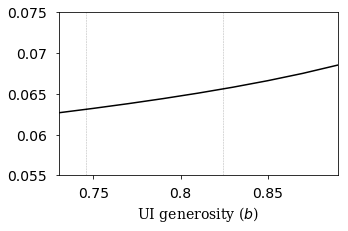

In [14]:
# Plot steady state unemployment rate 
select_tau = 3
fig = plt.figure(figsize=(5, 3))
lines = plt.plot(b_grid[select_tau],myreshape(StSt[:,0])[select_tau])

FormatPlot(lines,
           xlabel=r'UI generosity ($b$)',
           xlims=(b_grid[select_tau,0],b_grid[select_tau,-1]),
           xticks=np.linspace(0.75, 0.9, 4),
           ylims=(0.055,0.075),
           yticks = (0.055,0.06,0.065,0.070,0.075),
           VertLines = (OptSS[0],OptCyc[0]))


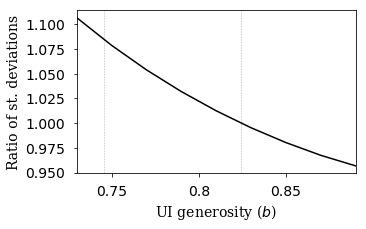

In [15]:
# Plot relative standard deviation of job-finding rate
select_tau = 3
X = b_grid[select_tau]
Y = myreshape(StDevs[:,5])[select_tau]
Y = Y/interp1d(X,Y)(OptCyc[0])

fig = plt.figure(figsize=(5, 3))
lines = plt.plot(X,Y)
FormatPlot(lines,
           xlabel=r'UI generosity ($b$)',
           ylabel='Ratio of st. deviations',
           xlims=(b_grid[select_tau,0],b_grid[select_tau,-1]),
           xticks=np.linspace(0.75, 0.9, 4),
           VertLines = (OptSS[0],OptCyc[0]))

In [34]:
def MakeUnpackPlot(mode):
    with np.load(os.path.join(OutDir,'Unpack_v'+str(VERSION)+'_param_' + mode +'_mode_fig.npz')) as X:
        ExpectedMarginalWelfare = X['ExpectedMarginalWelfare']
        Cov = X['Cov']
        EdwEdx = X['EdWdxEdxdparam']
        paramgrid = X['paramgrid'][:-1]


    # check if the figure directory exists and create it if it doesn't
    if not os.path.isdir(FIGURE_DIR):
        os.makedirs(FIGURE_DIR)

    if mode == 'b':
        parind = 0
        xlab = r'UI generosity ($b$)'
    else:
        parind = 1
        xlab = r'Tax progressivity ($\tau$)'    

    # convert to marginal consumption equivalents        
    ExpectedMarginalWelfare = (1-beta) * ExpectedMarginalWelfare
    #--debug--
    from OptStab import delta
    # ExpectedMarginalWelfare[:,0] *= (1-beta*(1-delta))/(1-beta)
    #--debug--
    Cov = (1-beta) * Cov
    EdwEdx = (1-beta) * EdwEdx

    # first fig --------------------------
    fig = plt.figure() 

    lines = plt.plot(paramgrid,np.hstack((ExpectedMarginalWelfare[:,[0,1]],
                                          ExpectedMarginalWelfare[:,2:].sum(axis=1)[np.newaxis].T - Cov[:,2:].sum(axis=1)[np.newaxis].T,
                                         Cov[:,2:].sum(axis=1)[np.newaxis].T)))

    FormatPlot(lines,
               xlabel=xlab,
               ylabel='Marginal welfare gain')

    L = plt.legend(lines,['Insurance', 'Incentives', 'Macro stab. E x E','Macro stab. Covariance'],fontsize = 14,bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.setp(L.texts, family='serif')

    fig.savefig(os.path.join(FIGURE_DIR,'UnpackFourTerms_'+mode+'.png'),bbox_inches = 'tight')
    
    # second fig ---------------------------
    fig = plt.figure() 
    lines = plt.plot(paramgrid,np.hstack((ExpectedMarginalWelfare[:,2:5],
                           ExpectedMarginalWelfare[:,5:].sum(axis=1)[np.newaxis].T)))
    
    FormatPlot(lines,
               xlabel=xlab,
               ylabel='Marginal welfare gain')
    
    L = plt.legend(lines,['Labor wedge','Price dispersion', 'Extensive margin', 'Idio. risk'],fontsize = 14,bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.setp(L.texts, family='serif')
    

    fig.savefig(os.path.join(FIGURE_DIR,'UnpackMacro_'+mode+'.png'),bbox_inches = 'tight')

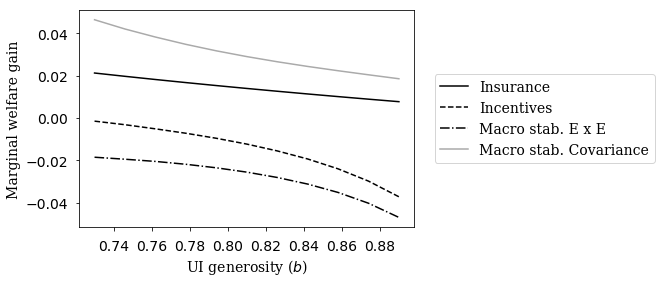

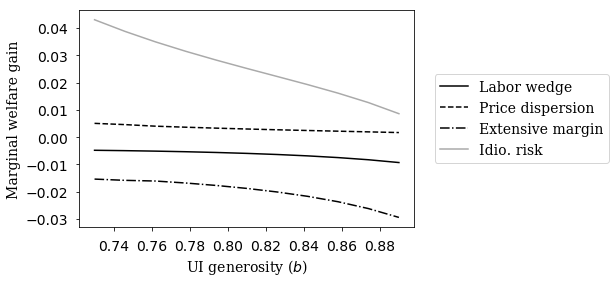

In [35]:
MakeUnpackPlot('b')

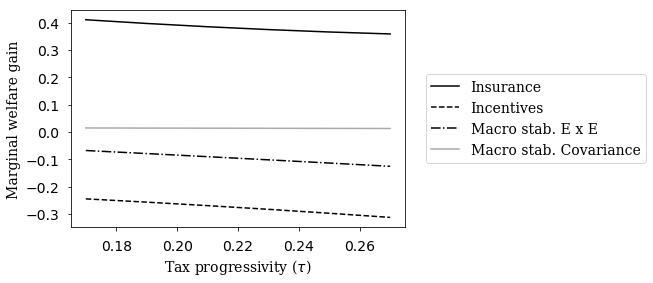

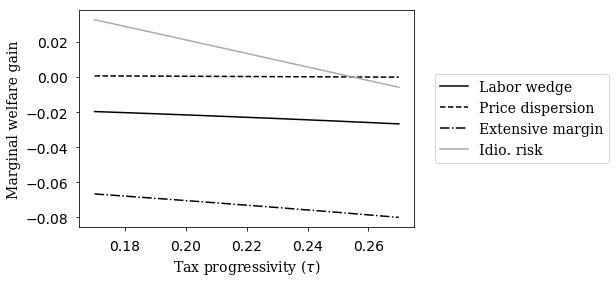

In [36]:
MakeUnpackPlot('tau')